# Import DTractor library

In [1]:
import DTractor
from DTractor import DTractor_main

/mnt/md0/jin/dtractor/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Global seed set to 0


# Model create

In [2]:
# Define DTractor spatial decomposition model
dtractor = DTractor_main.DTractor_pipeline() #set up parameters


IMPORTANT PREPROCESSING REQUIREMENTS:
Before using this notebook, please ensure both datasets are properly preprocessed:

For spatial transcriptomics data:
  - Filter low-quality spots (low gene count, high mitochondrial content)
  - Normalize counts (e.g., using sc.pp.normalize_total)
  - Log-transform data (e.g., using sc.pp.log1p)
  - Store spatial coordinates in .obsm['spatial']
  - Identify highly variable genes (e.g., using sc.pp.highly_variable_genes)
  - Filter out mitochondria-encoded genes if needed
  - batch corrections if needed

For single-cell/nucleus reference data:
  - Filter low-quality cells (low gene count, high mitochondrial content)
  - Normalize counts (e.g., using sc.pp.normalize_total)
  - Log-transform data (e.g., using sc.pp.log1p)
  - Annotate cell types in .obs['celltype']
  - Identify highly variable genes (e.g., using sc.pp.highly_variable_genes)
  - Consider using cell2location's filter_genes() to select informative genes
    that separate cell types in 

# Data validation

In [3]:
# Define Reference single-cell/nucleus dataset and spatial transcriptomics dataset
adata_ref = "adata_ref_13402.h5ad"
adata_spa = "adata_vis_13402.h5ad"

ref_data, spa_data = dtractor.data_import(adata_spa, adata_ref)

⚠️ WARNING: In AnnData, rows (obs) should be spots and columns (var) should be genes
adata spatial data is valid: 428 spots x 22237 genes
⚠️ WARNING: In AnnData, rows (obs) should be cells and columns (var) should be genes
adata reference data is valid: 1926 cells x 14475 genes


Found 13402 common genes between reference and visium datasets
These common genes will be used for downstream analysis


In [4]:
ref_data #user can use it to run their own VAE training

AnnData object with n_obs × n_vars = 1926 × 14475
    obs: 'new_celltype_final', 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_MT_gene', 'pct_counts_MT_gene', 'n_genes', 'leiden', 'celltype'
    var: 'MT_gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'nonz_mean'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'new_celltype_final_colors', 'paga', 'umap'
    obsm: 'MT', 'X_pca', 'X_umap'
    layers: 'counts_scvi', 'raw'
    obsp: 'connectivities', 'distances'

In [5]:
spa_data #user can use it to run their own VAE training

AnnData object with n_obs × n_vars = 428 × 22237
    obs: 'annotation', 'redeconve_annotation', 'n_genes_by_counts', 'total_counts', 'total_counts_MT_gene', 'pct_counts_MT_gene', 'n_genes', 'leiden'
    var: 'MT_gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'annotation_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'umap'
    obsm: 'MT', 'X_pca', 'X_umap', 'spatial'
    layers: 'counts_scvi', 'raw'
    obsp: 'connectivities', 'distances'

# Neural network training

Training VAE with seed: 42


Global seed set to 42
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Global seed set to 42



Checking reference data:
Min value in data: 0.0
Max value in data: 7.565827369689941
Number of negative values: 0
Percentage of negative values: 0.0000%



Checking spatial data:
Min value in data: 0.0
Max value in data: 4.2196173667907715
Number of negative values: 0
Percentage of negative values: 0.0000%



Training reference model on GPU


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


Epoch 50/50: 100%|██████████| 50/50 [00:07<00:00,  6.66it/s, loss=3.17e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [00:07<00:00,  6.37it/s, loss=3.17e+03, v_num=1]


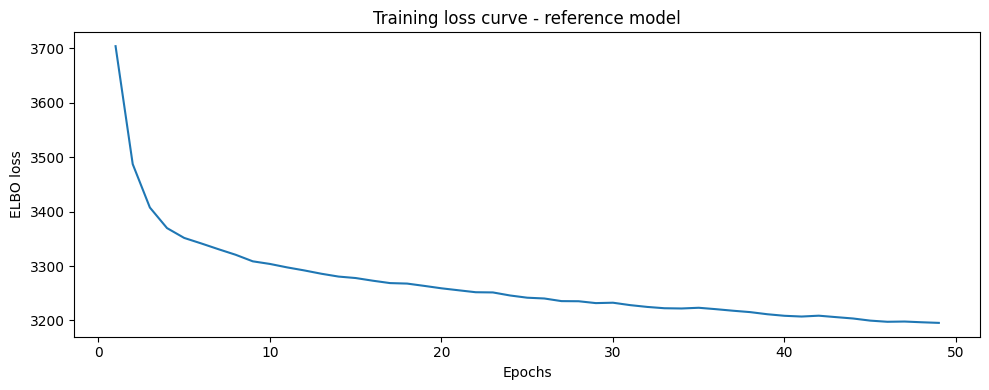

Global seed set to 42
Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]



Training spatial model on GPU
Epoch 70/70: 100%|██████████| 70/70 [00:04<00:00, 17.24it/s, loss=1.59e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=70` reached.


Epoch 70/70: 100%|██████████| 70/70 [00:04<00:00, 17.11it/s, loss=1.59e+03, v_num=1]


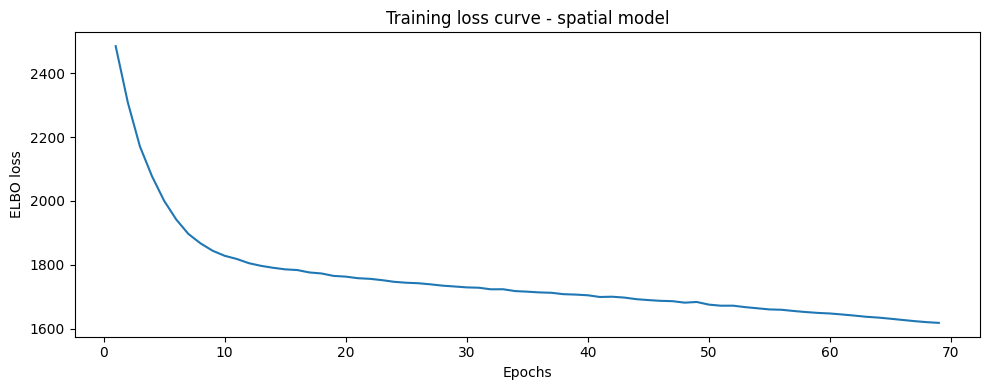

In [4]:
after_vae_ref, after_vae_spa = dtractor.vae_train(seed=42)

In [5]:
after_vae_ref #required value for further DTractor training: .obsm['mus']

AnnData object with n_obs × n_vars = 1926 × 13402
    obs: 'new_celltype_final', 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_MT_gene', 'pct_counts_MT_gene', 'n_genes', 'leiden', 'celltype', '_scvi_batch', '_scvi_labels'
    var: 'MT_gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'nonz_mean'
    uns: 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'new_celltype_final_colors', 'paga', 'umap', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'MT', 'X_pca', 'X_umap', 'mus', 'var'
    layers: 'counts_scvi', 'raw', 'data'
    obsp: 'connectivities', 'distances'

In [6]:
after_vae_spa #required value for further DTractor training: .obsm['mus']

AnnData object with n_obs × n_vars = 428 × 13402
    obs: 'annotation', 'redeconve_annotation', 'n_genes_by_counts', 'total_counts', 'total_counts_MT_gene', 'pct_counts_MT_gene', 'n_genes', 'leiden', '_scvi_batch', '_scvi_labels'
    var: 'MT_gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'annotation_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'umap', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'MT', 'X_pca', 'X_umap', 'spatial', 'mus', 'var'
    layers: 'counts_scvi', 'raw', 'data'
    obsp: 'connectivities', 'distances'

# Optional: parameter instruction

In [6]:
#optional: print instructions
dtractor.print_instructions()



adam_st_torch function parameters:
  regularization_option: 1 = Fastest (just Frobenius norm, no regularization)
                         2 = Simple regularization with argsort (faster)
                         3 = Sophisticated regularization with softmax (slower but potentially better)
  iteration_option:      1 = Use estimated iterations (est_iter)
                         2 = Use range-based iterations (end_range)
                         3 = Use user-defined iterations
  user_defined_iterations: Number of iterations if iteration_option is 3
  similarity_weight:     Weight for similarity loss (should be 0 for regularization_option=1)
  celltype_distance_weight: Weight for celltype distance loss (should be 0 for regularization_option=1)




**Iteration:**

Users need to fine-tune the number of iterations (default 250,000), for which we recommend three stop criteria approaches:

1. For simplest fine-tuning, users can use an iteration count determined by a regression equation based on spots, shared genes, cells, and cell types: $\text{iteration} = \text{50} \times S \text{ + 10} \times n \text{ - 5} \times C \text{ + 10000} \times k$

   This formula follows three principles: (1) iterations increase with spots $S$ and cell types $k$, (2) decrease with cells $C$, (3) and generally scale with genes $n$. Coefficients are simplified for robust estimation, with a minimum threshold of 50,000 iterations (defaulting to 100,000 if lower).

2. For acceptable performance with minimal effort (when ground truth ST annotation is available), the model can automatically select optimal iterations based on $R^2$. We determine an initial count $f$ using the first mode's equation and set iteration boundary as $i \in [f - 100,000, f + 100,000]$ if $f > 100,000$ or $i \in [0, 250,000]$ otherwise. At every 3,000 iterations, we perform PCA on $P$ and fit logistic regression models on PC scores to validate whether cell type proportions accurately capture tissue regions. The iteration maximizing $R^2$ is selected:

   $$
   \begin{aligned}
   \text{iteration} &= \text{argmax}_{i} R^2 = \text{logistic(PC(}P\text{), annotation)}\\
   i \in
   \begin{cases}
    [f - 100{,}000,\ f + 100{,}000] \, \big| \, i = 3{,}000 \cdot k, \; k \in \mathbb{Z}_{\geq 0} & \text{, if } f > 100{,}000 \\
    [0,\ 250{,}000] \, \big| \, i = 3{,}000 \cdot k, \; k \in \mathbb{Z}_{\geq 0} & \text{, otherwise}
   \end{cases}
   \end{aligned}
   $$

   The rationale for this approach is based on the premise that optimal iterations should maximize the correlation between deconvolved cell type proportions and known spatial annotations. Similar to how Redeconve uses mathematical criteria for hyperparameter autoselection, our method applies biological validation when ground truth is available. This ensures iterations are stopped at the precise point where the model best captures spatial tissue architecture, preventing both underfitting and overfitting while adapting to dataset-specific complexity.

3. For optimal DTractor performance, users can run the pipeline while testing statistical metrics at various iteration counts. We recommend starting at 100,000 iterations and increasing in 50,000 increments (150,000, 200,000, 250,000, etc.) until satisfactory results are achieved.

If ST annotation is available, we strongly recommend mode 2 with regularization weights set to 0, optimizing both performance and computational efficiency with minimal adjustment. When regularization assumptions align with the data, weights should be applied accordingly. Without ST annotation, we recommend aligning histology images with ST locations to overlay annotated regions. If alignment is not feasible, mode 1 serves as an effective starting point.

<br>
<br>


**Spatial Regularization trade-offs and recommendation:** 

Both regularizations enhance interpretability and robustness but come with additional computational cost—particularly in datasets with large numbers of spots and cell types. Further, some cell types may benefit more than others depending on spatial structure or alignment with SC references. We therefore recommend using the default Frobenius loss alone unless preliminary data analysis or pilot runs indicate that spatial or embedding regularization would substantially improve performance.

# Model running

### With own VAE

In [ ]:
# User can possibly run a separate VAE training on their own and then run DTractor model - parameter: dtractor_only_ref - user customized VAE trained anndata for reference data + dtracor_only_vis - user customized VAE trained anndata for spatial data
dtractor.run(seed=42, k=5, regularization_option=2, iteration_option=3, user_defined_iterations=320000, similarity_weight=0.1, celltype_distance_weight=0.1, dtractor_only_ref=after_vae_ref, dtractor_only_vis=after_vae_spa) #train DTractor model

### With implemented VAE

Global seed set to 42



spatial regularization 2 neighbors assumption = 5

it's good to go
Using Option 2: Simple regularization
Iteration [3000/320000], Entire Loss: 28617.79296875, Original: 7167.6005859375, Regularization 1: 21444.701171875, Regularization 2: 5.491000175476074
Iteration [6000/320000], Entire Loss: 30396.1015625, Original: 6642.8876953125, Regularization 1: 23747.701171875, Regularization 2: 5.514500141143799
Iteration [9000/320000], Entire Loss: 31013.892578125, Original: 6158.41259765625, Regularization 1: 24850.0, Regularization 2: 5.480999946594238
Iteration [12000/320000], Entire Loss: 31139.0234375, Original: 5710.3740234375, Regularization 1: 25423.201171875, Regularization 2: 5.447999954223633
Iteration [15000/320000], Entire Loss: 31001.791015625, Original: 5295.71240234375, Regularization 1: 25700.701171875, Regularization 2: 5.375999927520752
Iteration [18000/320000], Entire Loss: 30773.302734375, Original: 4911.98876953125, Regularization 1: 25856.099609375, Regularization 2: 5

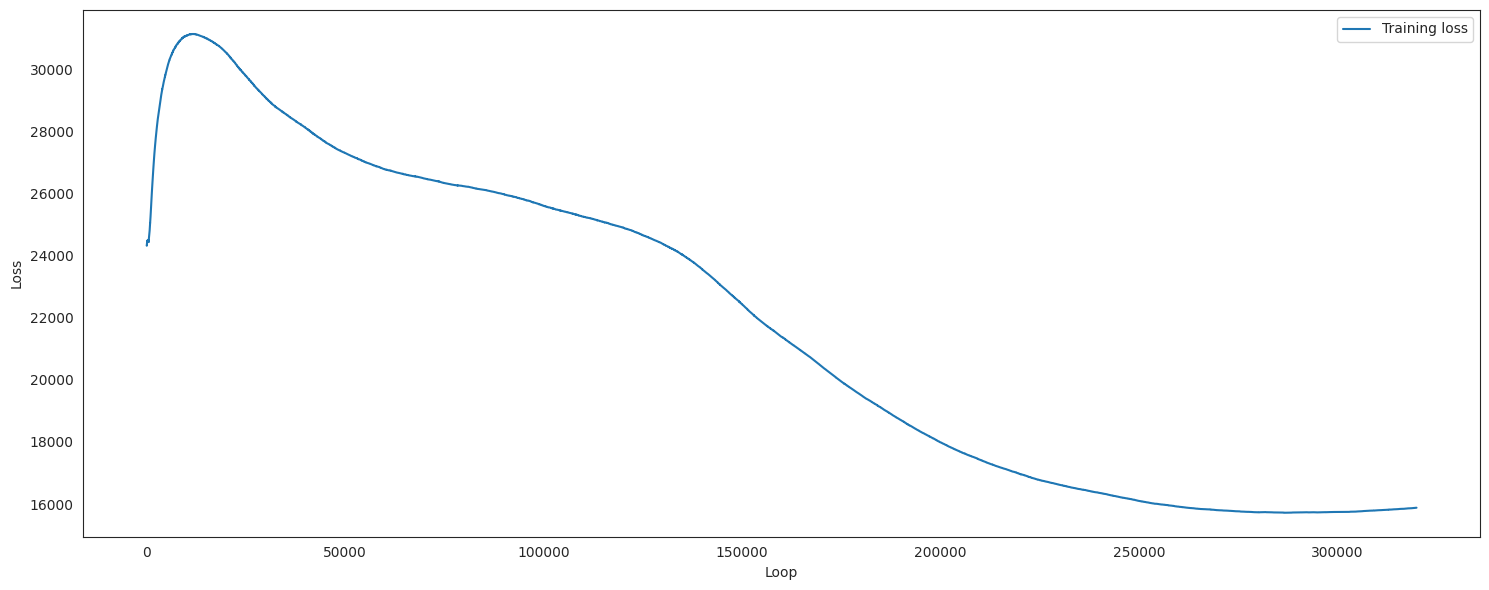

In [10]:
dtractor.run(seed=42, k=5, regularization_option=2, iteration_option=3, user_defined_iterations=320000, similarity_weight=0.1, celltype_distance_weight=0.1) #train DTractor model

# Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


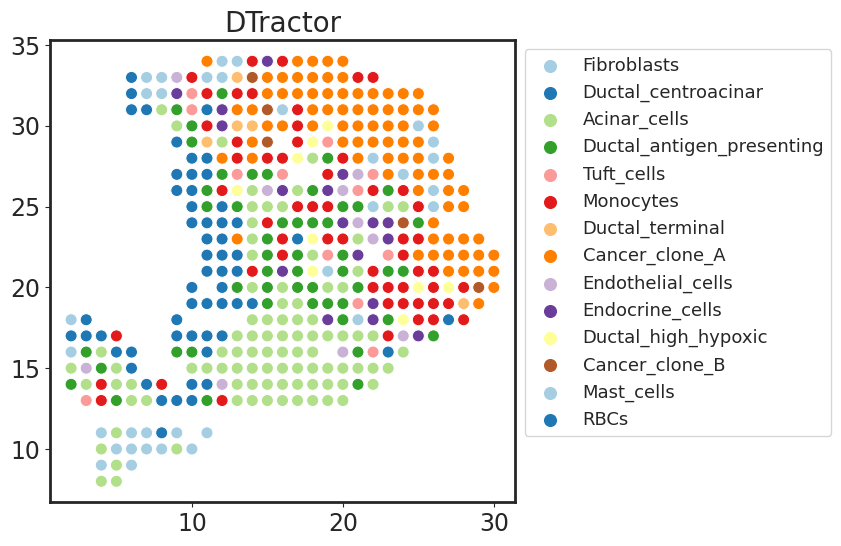

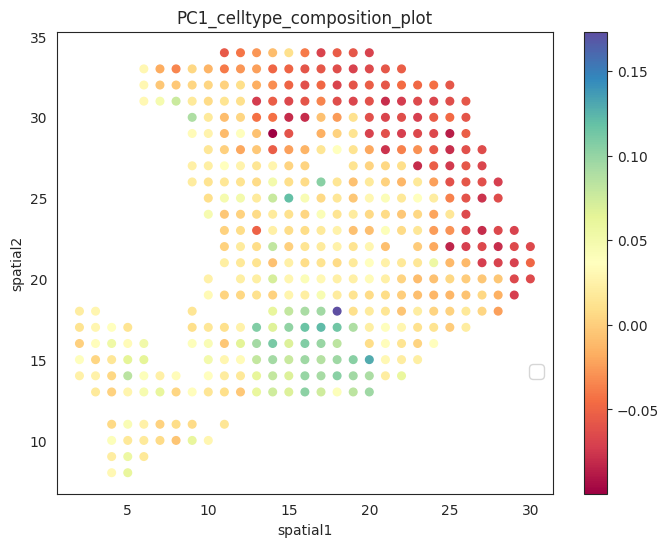

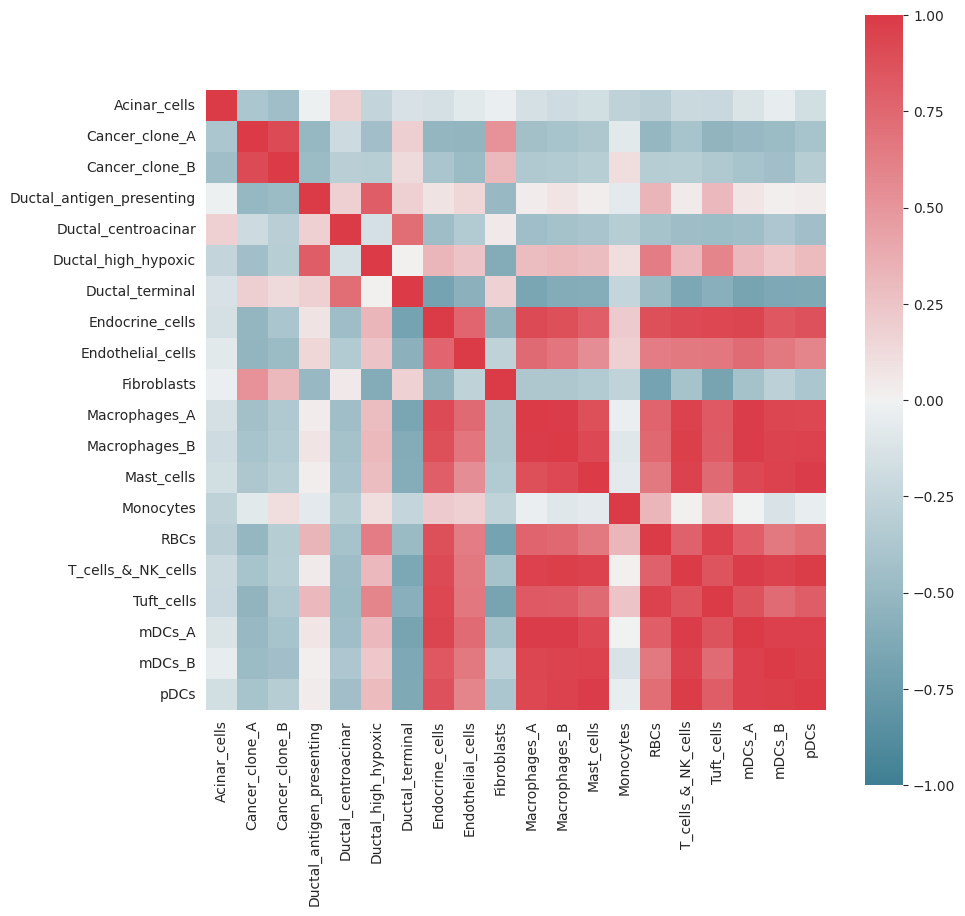

In [11]:
dtractor.plotting()

# Proportion matrix

In [12]:
deconvolution_anndata = dtractor.prop_matrix()
deconvolution_anndata

AnnData object with n_obs × n_vars = 428 × 20
    obs: 'annotation', 'celltype_pred'
    var: 'celltype'
    obsm: 'lat', 'lon'

# Cell count per spot inference

**Instruction:**

The user can infer a cell count per spot by simply getting a first PC using the 'deconvolution_anndata.X'.

For the parameters, we recommend users to start with `regularization_option=2, iteration_option=3, user_defined_iterations=250000, similarity_weight=0, celltype_distance_weight=0` for this task.